In [69]:
%matplotlib notebook
import numpy as np
from mpl_toolkits import mplot3d
import torch
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>


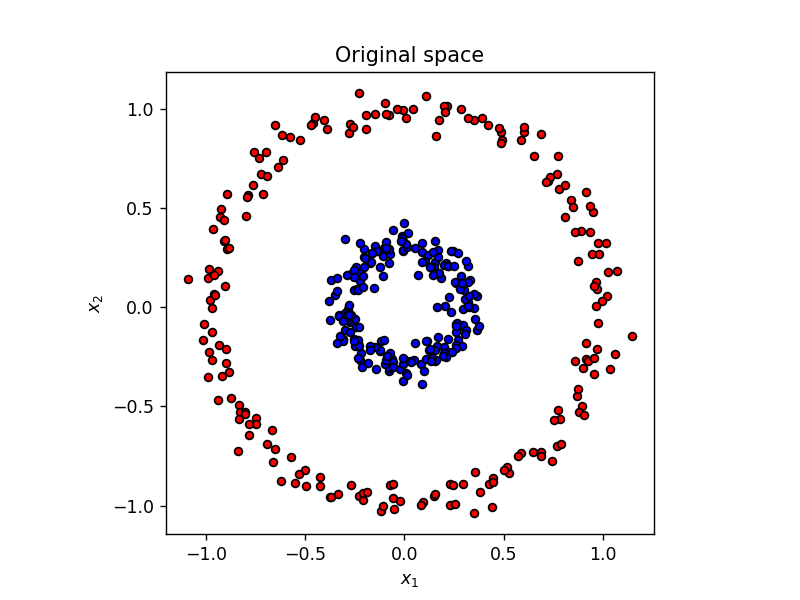

In [70]:
np.random.seed(42)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)


# Plot results

plt.figure()
plt.subplot(1, 1, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [71]:
#divide train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,test_size=0.30)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_train = torch.reshape(y_train, [-1, 1])
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_test = torch.reshape(y_test, [-1, 1])

In [72]:
class BinaryClass(torch.nn.Module):
    def __init__(self, n_input):
        super(BinaryClass, self).__init__()
        self.linear1 = torch.nn.Linear(n_input, 3)
        self.linear2 = torch.nn.Linear(3, 1)
        
    def forward(self, X):
        out = self.linear1(X)
        out = torch.sigmoid(out)
        out = self.linear2(out)
        out = torch.sigmoid(out)
        
        return out

In [73]:
w1 = torch.rand([3, 3], requires_grad=True)
w2 = torch.rand([4, 1], requires_grad=True)

In [74]:
hidden_layer = np.array([[0, 0, 0]])

In [75]:

def BinaryClassManual(X, save_hidden = False):

    global hidden_layer
    n_samples, _ = X.shape
    ones = torch.ones([n_samples, 1])

    X1 = torch.cat((X, ones), 1)
    #print(X1)
    #print(w1)
    out = torch.matmul(X1, w1)
    #print(out)
    out = torch.sigmoid(out)
    #out = torch.relu(out)
    #print(out)
    if (save_hidden):
        hidden_layer = np.append(hidden_layer, out.detach().numpy(), axis=0)
    
    H1 =  torch.cat((out, ones), 1)
    out = torch.matmul(H1, w2)
    out = torch.sigmoid(out)
    #out = torch.relu(out)
    return out

In [77]:
n_epoch = 10000
l_rate = 0.1

model = BinaryClass(2)
criterion = torch.nn.BCELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)
optimizer = torch.optim.SGD([w1, w2], lr=l_rate)

tic = time.perf_counter()

for epoch in range(n_epoch):
    
    #prediction
    #y_pred = model(X_train)
    y_pred = BinaryClassManual(X_train)
    #calculate loss
    loss = criterion(y_pred, y_train)
    #calculate gradients
    loss.backward()
    #update gradients
    optimizer.step()
    #zero grad
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        print(f'epoch: {epoch} loss: {loss.item()}')

toc = time.perf_counter()

print(f"Time elapsed: {toc - tic:0.4f} seconds")

epoch: 99 loss: 0.26176223158836365
epoch: 199 loss: 0.25537794828414917
epoch: 299 loss: 0.24844951927661896
epoch: 399 loss: 0.24096587300300598
epoch: 499 loss: 0.23292866349220276
epoch: 599 loss: 0.2243591994047165
epoch: 699 loss: 0.21530665457248688
epoch: 799 loss: 0.20585648715496063
epoch: 899 loss: 0.19613496959209442
epoch: 999 loss: 0.1863057017326355
epoch: 1099 loss: 0.17655543982982635
epoch: 1199 loss: 0.16707061231136322
epoch: 1299 loss: 0.15801088511943817
epoch: 1399 loss: 0.14949071407318115
epoch: 1499 loss: 0.14157302677631378
epoch: 1599 loss: 0.13427641987800598
epoch: 1699 loss: 0.12758728861808777
epoch: 1799 loss: 0.12147170305252075
epoch: 1899 loss: 0.1158854067325592
epoch: 1999 loss: 0.11078022420406342
epoch: 2099 loss: 0.10610795766115189
epoch: 2199 loss: 0.10182289779186249
epoch: 2299 loss: 0.09788306057453156
epoch: 2399 loss: 0.09425067901611328
epoch: 2499 loss: 0.09089215099811554
epoch: 2599 loss: 0.08777784556150436
epoch: 2699 loss: 0.084881

In [78]:
#X_test2 = torch.tensor([[0.0, 0.9], [-0.88, 0.0], [0.9, 0.9], [0, 0], [0.05, -0.05]])
X_test2 = torch.tensor([[0.05, -0.05]])

#Reset hidden layer
hidden_layer = np.array([[0, 0, 0]])

with torch.no_grad():
    
    #y_pred = model(X_test)
    y_pred = BinaryClassManual(X_test, True)
    
    y_pred_cls = y_pred.round()

    accuracy = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])

    print(f'Accuracy: {accuracy}')
    #print(y_pred)

Accuracy: 1.0


<IPython.core.display.Javascript object>


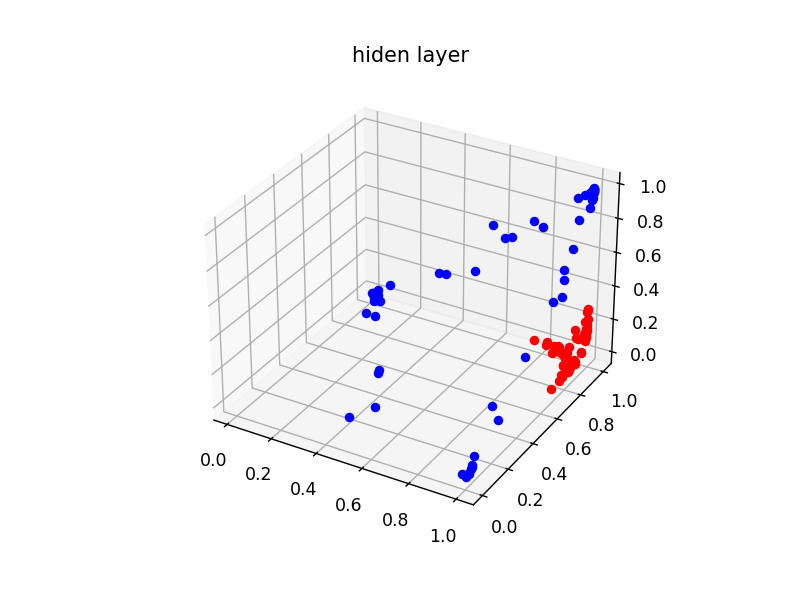

In [79]:
#delete first dummy value
hidden_layer = np.delete(hidden_layer, 0, axis=0)

hiden_layer_plot = np.append(hidden_layer, y_test.detach().numpy(), axis=1)

fig = plt.figure()
ax = plt.axes(projection ="3d")
plt.title("hiden layer")
 
for element in hiden_layer_plot:
    if (int(element[3]) == 0):
        ax.scatter3D(element[0], element[1], element[2], color = "blue")
    else:
        ax.scatter3D(element[0], element[1], element[2], color = "red")
    
plt.show()

In [80]:
print(w1)
print(w2)

tensor([[ 7.6286, -0.7311,  6.3477],
        [-2.8560,  9.1762,  5.0298],
        [ 3.9777,  4.2328, -4.0440]], requires_grad=True)
tensor([[  8.6137],
        [  8.6643],
        [-10.0040],
        [-11.9531]], requires_grad=True)


<IPython.core.display.Javascript object>


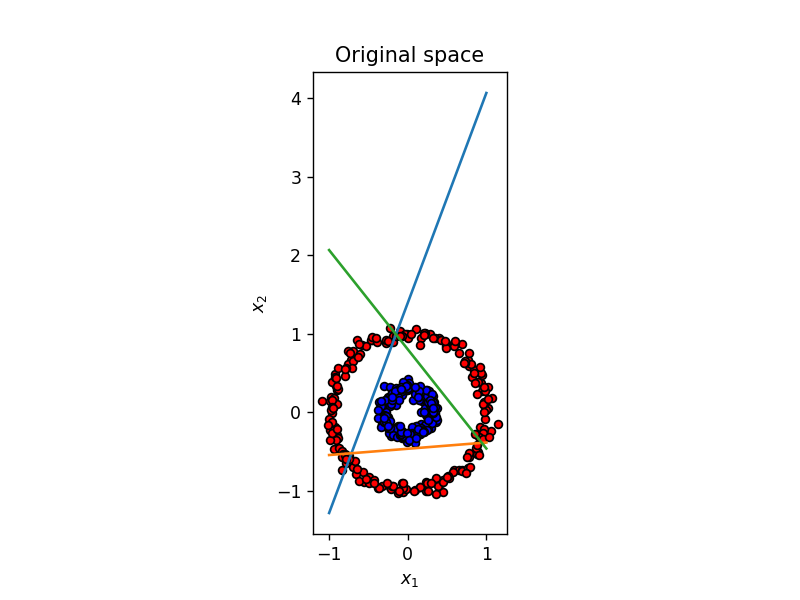

In [81]:
w1np = w1.detach().numpy()
w2np = w2.detach().numpy()

x1 = np.linspace(-1, 1, 4)
x2_n1 = (-x1 * w1np[0][0] - w1np[2][0]) / w1np[1][0]
x2_n2 = (-x1 * w1np[0][1] - w1np[2][1]) / w1np[1][1]
x2_n3 = (-x1 * w1np[0][2] - w1np[2][2]) / w1np[1][2]

plt.figure()
plt.subplot(1, 1, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor='k')
plt.plot(x1, x2_n1)
plt.plot(x1, x2_n2)
plt.plot(x1, x2_n3)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.show()

<IPython.core.display.Javascript object>


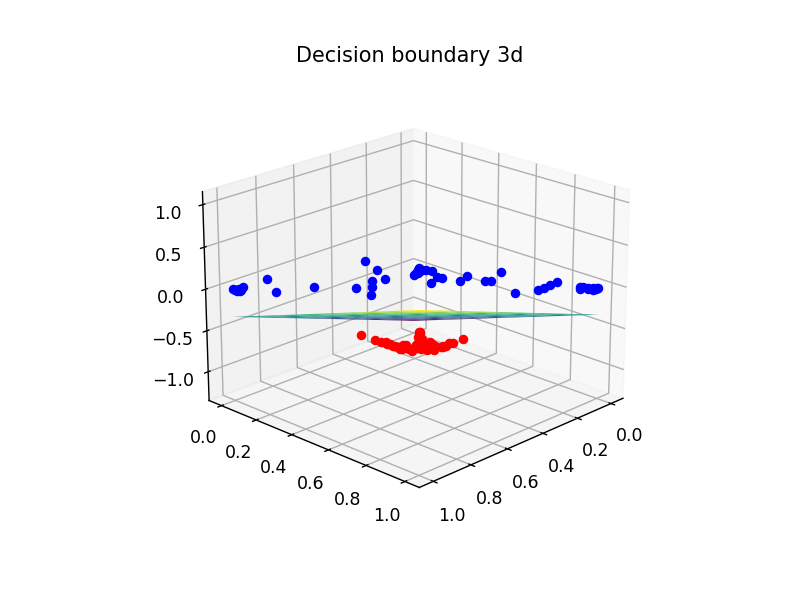

In [82]:
w2np = w2np.reshape(-1)

x1 = np.linspace(0, 1, 10)
x2 = np.linspace(0, 1, 10)

x1, x2 = np.meshgrid(x1, x2)

x3  = (-x1 * w2np[0] -x2 * w2np[1]  - w2np[3]) / w2np[2]

fig = plt.figure()
ax = plt.axes(projection ="3d")
plt.title("Decision boundary 3d")
 
ax.plot_surface(x1, x2, x3, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

for element in hiden_layer_plot:
    if (int(element[3]) == 0):
        ax.scatter3D(element[0], element[1], element[2], color = "blue")
    else:
        ax.scatter3D(element[0], element[1], element[2], color = "red")
plt.show()
